# Combined ROC

## ANN SAB model

In [1]:
import pandas as pd

sabEvaluateDf = pd.read_csv('data/evaluate_data_sab.csv')
sabEvaluateDf

ORF_LENGTH  UTR5_GC_CONTENT  FICKETT_A_POS  FICKETT_G_POS   
0             78         0.432558       1.250000       1.105263  \
1            585         0.524297       1.009569       1.253968   
2            279         0.572464       1.159091       2.037037   
3             48         0.459350       1.348837       1.218750   
4             60         0.523121       1.056604       1.675676   
...          ...              ...            ...            ...   
7995         348         0.428115       1.309859       1.106145   
7996         195         0.474510       1.318841       1.269841   
7997         168         0.416000       1.072727       1.197802   
7998         129         0.407767       1.147727       1.074627   
7999         261         0.485493       1.153226       1.058824   

      FICKETT_T_POS  FICKETT_BASE_RATIO_2  FICKETT_BASE_RATIO_4       SNR   
0          1.181818              0.202247              0.297753  0.023033  \
1          1.149123              0.150685              0.349079  0.098541   
2          2.384615              0.301560              0.232236  0.312645   
3          1.121951              0.219008              0.264463  0.075584   
4          1.404762              0.203448              0.268966  0.156159   
...             ...                   ...                   ...       ...   
7995       1.159574              0.271523              0.266667  0.020024   
7996       1.123457              0.265111              0.266172  0.034525   
7997       1.021978              0.180180              0.332132  0.081251   
7998       1.052083              0.238372              0.282946  0.130446   
7999       1.179245              0.221796              0.269378  0.019292   

         QNT_2     QNT_3  TARGET  
0     0.088072  0.175790       0  
1     0.611536  1.209186       0  
2     0.180871  0.365009       0  
3     0.148962  0.292822       0  
4     0.190454  0.383323       0  
...        ...       ...     ...  
7995  0.809716  1.546571       1  
7996  0.289747  0.598125       1  
7997  0.425411  0.924219       1  
7998  0.274032  0.585938       1  
7999  0.349427  0.753653       1  

[8000 rows x 11 columns]

In [2]:
import pickle
from tensorflow import keras

sabModel = keras.models.load_model('data/model_sab.h5')
sabScaler = pickle.load(open('data/scaler_sab.pkl','rb'))

2023-08-31 16:11:28.575735: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 16:11:31.065675: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 16:11:31.068915: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 16:11:36.870126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/superbugai-data/yash/chapter_1/workspace/linc2functionpipeline/.venv/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your

In [3]:
sabEvaluateScaledDf = sabScaler.transform(sabEvaluateDf.iloc[:, :-1])
sabEvaluateScaledDf

/superbugai-data/yash/chapter_1/workspace/linc2functionpipeline/.venv/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[-0.6468678 , -0.80474603, -0.26191278, ..., -0.72099355,
        -1.02564293, -1.02852046],
       [ 0.40322658, -0.05696973, -0.73071626, ..., -0.32884209,
         1.28718326,  1.23958521],
       [-0.2305582 ,  0.33564839, -0.43917181, ...,  0.78310693,
        -0.61562824, -0.61322041],
       ...,
       [-0.46046052, -0.93971423, -0.60756789, ..., -0.41863867,
         0.4648292 ,  0.61413788],
       [-0.54123701, -1.00682288, -0.46132919, ..., -0.16314197,
        -0.20401418, -0.12832329],
       [-0.26783965, -0.37326316, -0.45060788, ..., -0.74042068,
         0.12910643,  0.23977787]])

In [4]:
sabPreds = sabModel.predict([sabEvaluateScaledDf])

250/250 [==============================] - 1s 748us/step


In [5]:
sabEvaluateScaled = pd.DataFrame(sabEvaluateScaledDf, columns=sabEvaluateDf.columns[:-1])
sabEvaluateScaled

ORF_LENGTH  UTR5_GC_CONTENT  FICKETT_A_POS  FICKETT_G_POS   
0      -0.646868        -0.804746      -0.261913      -0.842828  \
1       0.403227        -0.056970      -0.730716      -0.364023   
2      -0.230558         0.335648      -0.439172       2.157321   
3      -0.709004        -0.586364      -0.069195      -0.477420   
4      -0.684149        -0.066550      -0.639006       0.993801   
...          ...              ...            ...            ...   
7995   -0.087646        -0.840963      -0.145196      -0.839987   
7996   -0.404538        -0.462791      -0.127684      -0.312915   
7997   -0.460461        -0.939714      -0.607568      -0.544868   
7998   -0.541237        -1.006823      -0.461329      -0.941471   
7999   -0.267840        -0.373263      -0.450608      -0.992355   

      FICKETT_T_POS  FICKETT_BASE_RATIO_2  FICKETT_BASE_RATIO_4       SNR   
0         -0.486294             -0.857617              1.277619 -0.720994  \
1         -0.571610             -1.920104              2.440896 -0.328842   
2          2.652295              1.188808             -0.207289  0.783107   
3         -0.642512             -0.512241              0.523120 -0.448069   
4          0.095457             -0.832868              0.625172 -0.029603   
...             ...                   ...                   ...       ...   
7995      -0.544337              0.569876              0.573070 -0.736619   
7996      -0.638583              0.437755              0.561854 -0.661306   
7997      -0.903383             -1.312328              2.056807 -0.418639   
7998      -0.824825             -0.113231              0.942026 -0.163142   
7999      -0.493008             -0.454800              0.634529 -0.740421   

         QNT_2     QNT_3  
0    -1.025643 -1.028520  
1     1.287183  1.239585  
2    -0.615628 -0.613220  
3    -0.756610 -0.771658  
4    -0.573287 -0.573025  
...        ...       ...  
7995  2.162807  1.980080  
7996 -0.134579 -0.101575  
7997  0.464829  0.614138  
7998 -0.204014 -0.128323  
7999  0.129106  0.239778  

[8000 rows x 10 columns]

## ANN HSB model

In [6]:
import pandas as pd

hsbEvaluateDf = pd.read_csv('data/evaluate_data_hsb.csv')
hsbEvaluateDf

ORF_LENGTH  UTR5_GC_CONTENT  HEXAMER_BIAS  CODON_BIAS  FICKETT_A_POS   
0             78         0.432558     -0.033535    0.289910       1.250000  \
1            585         0.524297     -0.038073    0.295224       1.009569   
2            279         0.572464     -0.011868    0.291102       1.159091   
3             48         0.459350     -0.364665    0.280152       1.348837   
4             60         0.523121     -0.199383    0.270006       1.056604   
...          ...              ...           ...         ...            ...   
7995         348         0.428115     -0.196689    0.287279       1.309859   
7996         195         0.474510     -0.148418    0.289358       1.318841   
7997         168         0.416000     -0.161227    0.300385       1.072727   
7998         129         0.407767     -0.209478    0.301388       1.147727   
7999         261         0.485493     -0.148358    0.313567       1.153226   

      FICKETT_G_POS  FICKETT_T_POS   DFT_MAX       SNR     QNT_3  TARGET  
0          1.105263       1.181818  0.125848  0.023033  0.175790       0  
1          1.253968       1.149123  3.121581  0.098541  1.209186       0  
2          2.037037       2.384615  2.680368  0.312645  0.365009       0  
3          1.218750       1.121951  0.541131  0.075584  0.292822       0  
4          1.675676       1.404762  1.311280  0.156159  0.383323       0  
...             ...            ...       ...       ...       ...     ...  
7995       1.106145       1.159574  0.663079  0.020024  1.546571       1  
7996       1.269841       1.123457  0.483370  0.034525  0.598125       1  
7997       1.197802       1.021978  2.051925  0.081251  0.924219       1  
7998       1.074627       1.052083  2.024842  0.130446  0.585938       1  
7999       1.058824       1.179245  0.376628  0.019292  0.753653       1  

[8000 rows x 11 columns]

In [7]:
import pickle
from tensorflow import keras

hsbModel = keras.models.load_model('data/model_hsb.h5')
hsbScaler = pickle.load(open('data/scaler_hsb.pkl','rb'))

/superbugai-data/yash/chapter_1/workspace/linc2functionpipeline/.venv/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
hsbEvaluateScaledDf = hsbScaler.transform(hsbEvaluateDf.iloc[:, :-1])
hsbEvaluateScaledDf

/superbugai-data/yash/chapter_1/workspace/linc2functionpipeline/.venv/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[-0.6468678 , -0.80474603,  0.10812867, ..., -0.47537039,
        -0.72099355, -1.02852046],
       [ 0.40322658, -0.05696973,  0.08608608, ...,  0.00995581,
        -0.32884209,  1.23958521],
       [-0.2305582 ,  0.33564839,  0.21337762, ..., -0.0615232 ,
         0.78310693, -0.61322041],
       ...,
       [-0.46046052, -0.93971423, -0.5121405 , ..., -0.16333472,
        -0.41863867,  0.61413788],
       [-0.54123701, -1.00682288, -0.74652151, ..., -0.16772231,
        -0.16314197, -0.12832329],
       [-0.26783965, -0.37326316, -0.44962705, ..., -0.43474251,
        -0.74042068,  0.23977787]])

In [9]:
hsbPreds = hsbModel.predict([hsbEvaluateScaledDf])

250/250 [==============================] - 0s 719us/step


In [10]:
hsbEvaluateScaled = pd.DataFrame(hsbEvaluateScaledDf, columns=hsbEvaluateDf.columns[:-1])
hsbEvaluateScaled

ORF_LENGTH  UTR5_GC_CONTENT  HEXAMER_BIAS  CODON_BIAS  FICKETT_A_POS   
0      -0.646868        -0.804746      0.108129   -0.260486      -0.261913  \
1       0.403227        -0.056970      0.086086    0.043500      -0.730716   
2      -0.230558         0.335648      0.213378   -0.192312      -0.439172   
3      -0.709004        -0.586364     -1.500349   -0.818660      -0.069195   
4      -0.684149        -0.066550     -0.697483   -1.399043      -0.639006   
...          ...              ...           ...         ...            ...   
7995   -0.087646        -0.840963     -0.684400   -0.410980      -0.145196   
7996   -0.404538        -0.462791     -0.449922   -0.292026      -0.127684   
7997   -0.460461        -0.939714     -0.512141    0.338736      -0.607568   
7998   -0.541237        -1.006823     -0.746522    0.396067      -0.461329   
7999   -0.267840        -0.373263     -0.449627    1.092734      -0.450608   

      FICKETT_G_POS  FICKETT_T_POS   DFT_MAX       SNR     QNT_3  
0         -0.842828      -0.486294 -0.475370 -0.720994 -1.028520  
1         -0.364023      -0.571610  0.009956 -0.328842  1.239585  
2          2.157321       2.652295 -0.061523  0.783107 -0.613220  
3         -0.477420      -0.642512 -0.408092 -0.448069 -0.771658  
4          0.993801       0.095457 -0.283323 -0.029603 -0.573025  
...             ...            ...       ...       ...       ...  
7995      -0.839987      -0.544337 -0.388336 -0.736619  1.980080  
7996      -0.312915      -0.638583 -0.417450 -0.661306 -0.101575  
7997      -0.544868      -0.903383 -0.163335 -0.418639  0.614138  
7998      -0.941471      -0.824825 -0.167722 -0.163142 -0.128323  
7999      -0.992355      -0.493008 -0.434743 -0.740421  0.239778  

[8000 rows x 10 columns]

## ANN HSG model

In [11]:
import pandas as pd

hsgEvaluateDf = pd.read_csv('data/evaluate_data_hsg.csv')
hsgEvaluateDf

CODON_BIAS    DFT_MAX  FICKETT_A_POS  FICKETT_BASE_RATIO_1   
0       0.293923   0.606182       1.125000              0.284483  \
1       0.300106   1.376693       1.900000              0.221106   
2       0.275264  11.706479       1.431655              0.204097   
3       0.299531   2.810975       1.580000              0.183799   
4       0.280862   1.691589       1.021505              0.241438   
...          ...        ...            ...                   ...   
7995    0.281230   2.932986       1.171975              0.224654   
7996    0.293860   2.275339       1.120370              0.346329   
7997    0.276437   2.125508       1.400000              0.247214   
7998    0.268786   2.540641       1.494737              0.231946   
7999    0.286935   1.808287       1.134615              0.303196   

      FICKETT_BASE_RATIO_2  FICKETT_BASE_RATIO_3  FICKETT_BASE_RATIO_4   
0                 0.229885              0.221264              0.264368  \
1                 0.278894              0.241206              0.258794   
2                 0.312717              0.269811              0.213375   
3                 0.296068              0.269067              0.251066   
4                 0.261130              0.272260              0.225171   
...                    ...                   ...                   ...   
7995              0.238499              0.282715              0.254131   
7996              0.199494              0.176709              0.277468   
7997              0.240122              0.283688              0.228977   
7998              0.271726              0.271726              0.224602   
7999              0.205479              0.206393              0.284932   

      FICKETT_C_POS  FICKETT_G_POS  FICKETT_T_POS  ...       SNR       TFP   
0          1.037736       1.386364       1.160714  ...  0.058875  0.000000  \
1          2.950000       2.041667       2.318182  ...  0.235350  0.694184   
2          1.251012       1.281553       1.394737  ...  0.314004  0.263847   
3          1.216216       1.290123       1.250000  ...  0.092108  0.281346   
4          1.126316       1.325843       1.397260  ...  0.101252  0.174806   
...             ...            ...            ...  ...       ...       ...   
7995       1.082353       1.243523       1.209581  ...  0.092153  0.000000   
7996       1.216667       1.330097       1.260870  ...  0.075926  0.000000   
7997       1.250000       1.400000       1.901961  ...  0.152081  0.000000   
7998       1.472000       1.217391       1.404040  ...  0.108507  0.000000   
7999       1.013333       1.453125       1.135417  ...  0.110669  0.000000   

      TOTAL_IE        UP  UTR3_COVERAGE  UTR3_GC_CONTENT  UTR5_COVERAGE   
0      -282.97  0.093525       0.537356         0.398396       0.290230  \
1      -256.82  0.128463       0.095477         0.236842       0.369347   
2      -406.03  0.121036       0.335910         0.571922       0.245458   
3      -397.91  0.109479       0.346281         0.522572       0.224538   
4      -329.94  0.123393       0.152397         0.578652       0.387842   
...        ...       ...            ...              ...            ...   
7995   -398.11  0.120197       0.667262         0.487952       0.040643   
7996   -310.43  0.105370       0.517468         0.312133       0.046582   
7997   -330.76  0.117647       0.163121         0.422360       0.268490   
7998   -392.82  0.129210       0.284578         0.434409       0.160955   
7999   -298.62  0.107861       0.278539         0.426230       0.148858   

      UTR5_GC_CONTENT        UU  TARGET  
0            0.544554  0.299281  coding  
1            0.619048  0.269521  coding  
2            0.513386  0.239753  coding  
3            0.609705  0.245972  coding  
4            0.578366  0.237361  coding  
...               ...       ...     ...  
7995         0.725275  0.222520  coding  
7996         0.673913  0.343465  coding  
7997         0.667925  0.256592  coding  
7998         0.619772  0.227802  coding  


In [12]:
import pickle
from tensorflow import keras

hsgModel = keras.models.load_model('data/model_hsg.h5')
hsgScaler = pickle.load(open('data/scaler_hsg.pkl','rb'))

/superbugai-data/yash/chapter_1/workspace/linc2functionpipeline/.venv/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [13]:
hsgEvaluateScaledDf = hsgScaler.transform(hsgEvaluateDf.iloc[:, :-1])
hsgEvaluateScaledDf

/superbugai-data/yash/chapter_1/workspace/linc2functionpipeline/.venv/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[-0.03094101, -0.39755346, -0.50564395, ...,  0.0164674 ,
         0.10815488,  0.58488711],
       [ 0.32274428, -0.27272614,  1.00548926, ...,  0.35967499,
         0.71536124, -0.06271569],
       [-1.09825457,  1.40075936,  0.09228646, ..., -0.17775204,
        -0.14590588, -0.71053027],
       ...,
       [-1.03113038, -0.15141379,  0.03056461, ..., -0.07783824,
         1.11376519, -0.34407215],
       [-1.46882107, -0.0841599 ,  0.21528718, ..., -0.54432617,
         0.72126468, -0.97059973],
       [-0.43062938, -0.20280546, -0.48689539, ..., -0.59679957,
         0.72012383,  0.71591436]])

In [14]:
hsgPreds = hsgModel.predict([hsgEvaluateScaledDf])

250/250 [==============================] - 0s 733us/step


## ANN SAG model

In [15]:
import pandas as pd

sagEvaluateDf = pd.read_csv('data/evaluate_data_sag.csv')
sagEvaluateDf

DFT_MAX  FICKETT_A_POS  FICKETT_BASE_RATIO_1  FICKETT_BASE_RATIO_2   
0      0.606182       1.125000              0.284483              0.229885  \
1      1.376693       1.900000              0.221106              0.278894   
2     11.706479       1.431655              0.204097              0.312717   
3      2.810975       1.580000              0.183799              0.296068   
4      1.691589       1.021505              0.241438              0.261130   
...         ...            ...                   ...                   ...   
7995   2.932986       1.171975              0.224654              0.238499   
7996   2.275339       1.120370              0.346329              0.199494   
7997   2.125508       1.400000              0.247214              0.240122   
7998   2.540641       1.494737              0.231946              0.271726   
7999   1.808287       1.134615              0.303196              0.205479   

      FICKETT_BASE_RATIO_3  FICKETT_BASE_RATIO_4  FICKETT_C_POS   
0                 0.221264              0.264368       1.037736  \
1                 0.241206              0.258794       2.950000   
2                 0.269811              0.213375       1.251012   
3                 0.269067              0.251066       1.216216   
4                 0.272260              0.225171       1.126316   
...                    ...                   ...            ...   
7995              0.282715              0.254131       1.082353   
7996              0.176709              0.277468       1.216667   
7997              0.283688              0.228977       1.250000   
7998              0.271726              0.224602       1.472000   
7999              0.206393              0.284932       1.013333   

      FICKETT_G_POS  FICKETT_T_POS         GC  ...       SNR       TFP   
0          1.386364       1.160714  45.114943  ...  0.058875  0.000000  \
1          2.041667       2.318182  52.010050  ...  0.235350  0.694184   
2          1.281553       1.394737  58.252802  ...  0.314004  0.263847   
3          1.290123       1.250000  56.513501  ...  0.092108  0.281346   
4          1.325843       1.397260  53.339041  ...  0.101252  0.174806   
...             ...            ...        ...  ...       ...       ...   
7995       1.243523       1.209581  52.121483  ...  0.092153  0.000000   
7996       1.330097       1.260870  37.620253  ...  0.075926  0.000000   
7997       1.400000       1.901961  52.380952  ...  0.152081  0.000000   
7998       1.217391       1.404040  54.345165  ...  0.108507  0.000000   
7999       1.453125       1.135417  41.187215  ...  0.110669  0.000000   

      TOTAL_IE        UP  UTR3_COVERAGE  UTR3_GC_CONTENT  UTR5_COVERAGE   
0      -282.97  0.093525       0.537356         0.398396       0.290230  \
1      -256.82  0.128463       0.095477         0.236842       0.369347   
2      -406.03  0.121036       0.335910         0.571922       0.245458   
3      -397.91  0.109479       0.346281         0.522572       0.224538   
4      -329.94  0.123393       0.152397         0.578652       0.387842   
...        ...       ...            ...              ...            ...   
7995   -398.11  0.120197       0.667262         0.487952       0.040643   
7996   -310.43  0.105370       0.517468         0.312133       0.046582   
7997   -330.76  0.117647       0.163121         0.422360       0.268490   
7998   -392.82  0.129210       0.284578         0.434409       0.160955   
7999   -298.62  0.107861       0.278539         0.426230       0.148858   

      UTR5_GC_CONTENT        UU  TARGET  
0            0.544554  0.299281  coding  
1            0.619048  0.269521  coding  
2            0.513386  0.239753  coding  
3            0.609705  0.245972  coding  
4            0.578366  0.237361  coding  
...               ...       ...     ...  
7995         0.725275  0.222520  coding  
7996         0.673913  0.343465  coding  
7997         0.667925  0.256592  coding  
7998         0.619772  0.227802  coding  
7999         0

In [16]:
import pickle
from tensorflow import keras

sagModel = keras.models.load_model('data/model_sag.h5')
sagScaler = pickle.load(open('data/scaler_sag.pkl','rb'))

/superbugai-data/yash/chapter_1/workspace/linc2functionpipeline/.venv/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.22.2.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
sagEvaluateScaledDf = sagScaler.transform(sagEvaluateDf.iloc[:, :-1])
sagEvaluateScaledDf

/superbugai-data/yash/chapter_1/workspace/linc2functionpipeline/.venv/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[-0.39755346, -0.50564395,  0.34210975, ...,  0.0164674 ,
         0.10815488,  0.58488711],
       [-0.27272614,  1.00548926, -0.89912713, ...,  0.35967499,
         0.71536124, -0.06271569],
       [ 1.40075936,  0.09228646, -1.23222946, ..., -0.17775204,
        -0.14590588, -0.71053027],
       ...,
       [-0.15141379,  0.03056461, -0.38779958, ..., -0.07783824,
         1.11376519, -0.34407215],
       [-0.0841599 ,  0.21528718, -0.68681471, ..., -0.54432617,
         0.72126468, -0.97059973],
       [-0.20280546, -0.48689539,  0.70861355, ..., -0.59679957,
         0.72012383,  0.71591436]])

In [18]:
sagPreds = sagModel.predict([sagEvaluateScaledDf])

250/250 [==============================] - 0s 713us/step


## LncRNAnet model

In [19]:
import pandas as pd

lrnEvaluateMrnaDf = pd.read_csv('data/evaluate_data_lrn_mrna.csv', header=None, sep='\t')
lrnEvaluateMrnaDf

0     1         2
0     ENST00000548218.1|ENSG00000011465.17|OTTHUMG00...   356  0.755758
1     ENST00000556683.1|ENSG00000139921.13|OTTHUMG00...  2117 -0.993514
2     ENST00000526346.5|ENSG00000126883.17|OTTHUMG00...   577  0.893453
3     ENST00000592846.5|ENSG00000049759.18|OTTHUMG00...   484 -0.991443
4     ENST00000584385.5|ENSG00000108406.10|OTTHUMG00...   580 -0.999612
...                                                 ...   ...       ...
3995  ENST00000515013.5|ENSG00000152784.16|OTTHUMG00...  2514 -0.999377
3996  ENST00000534501.5|ENSG00000147642.17|OTTHUMG00...   613 -0.964744
3997  ENST00000541923.5|ENSG00000164120.14|OTTHUMG00...  2920 -0.736616
3998  ENST00000437316.7|ENSG00000232629.9|OTTHUMG000...  1212 -0.999182
3999  ENST00000472610.5|ENSG00000148444.16|OTTHUMG00...   428 -0.808325

[4000 rows x 3 columns]

In [20]:
import pandas as pd

lrnEvaluateLncrnaDf = pd.read_csv('data/evaluate_data_lrn_lncrna.csv', header=None, sep='\t')
lrnEvaluateLncrnaDf

0     1         2
0     ENST00000664245.1|ENSG00000257771.6|OTTHUMG000...  1931  0.988744
1     ENST00000481334.1|ENSG00000242440.2|OTTHUMG000...   390  0.990860
2     ENST00000633779.1|ENSG00000282121.1|OTTHUMG000...   486  0.917874
3     ENST00000653865.1|ENSG00000203999.9|OTTHUMG000...  2089  0.969340
4     ENST00000663264.1|ENSG00000287154.1|OTTHUMG000...   585  0.689695
...                                                 ...   ...       ...
3995  ENST00000657525.1|ENSG00000235824.5|OTTHUMG000...  2265  0.996353
3996  ENST00000668795.1|ENSG00000232044.7|OTTHUMG000...   943  0.987786
3997  ENST00000656701.1|ENSG00000256193.6|OTTHUMG000...  1665  0.971844
3998  ENST00000574540.2|ENSG00000262801.6|OTTHUMG000...  1032  0.950892
3999  ENST00000662654.1|ENSG00000277047.5|OTTHUMG000...  1303  0.625435

[4000 rows x 3 columns]

In [21]:
lrnEvaluateDf = pd.concat([lrnEvaluateMrnaDf, lrnEvaluateLncrnaDf], ignore_index=True)
lrnEvaluateDf

0     1         2
0     ENST00000548218.1|ENSG00000011465.17|OTTHUMG00...   356  0.755758
1     ENST00000556683.1|ENSG00000139921.13|OTTHUMG00...  2117 -0.993514
2     ENST00000526346.5|ENSG00000126883.17|OTTHUMG00...   577  0.893453
3     ENST00000592846.5|ENSG00000049759.18|OTTHUMG00...   484 -0.991443
4     ENST00000584385.5|ENSG00000108406.10|OTTHUMG00...   580 -0.999612
...                                                 ...   ...       ...
7995  ENST00000657525.1|ENSG00000235824.5|OTTHUMG000...  2265  0.996353
7996  ENST00000668795.1|ENSG00000232044.7|OTTHUMG000...   943  0.987786
7997  ENST00000656701.1|ENSG00000256193.6|OTTHUMG000...  1665  0.971844
7998  ENST00000574540.2|ENSG00000262801.6|OTTHUMG000...  1032  0.950892
7999  ENST00000662654.1|ENSG00000277047.5|OTTHUMG000...  1303  0.625435

[8000 rows x 3 columns]

In [22]:
lrnEvaluateDf[3] = lrnEvaluateDf[2].apply(lambda x: (1 - ((x + 1) / (2))))
lrnEvaluateDf

0     1         2   
0     ENST00000548218.1|ENSG00000011465.17|OTTHUMG00...   356  0.755758  \
1     ENST00000556683.1|ENSG00000139921.13|OTTHUMG00...  2117 -0.993514   
2     ENST00000526346.5|ENSG00000126883.17|OTTHUMG00...   577  0.893453   
3     ENST00000592846.5|ENSG00000049759.18|OTTHUMG00...   484 -0.991443   
4     ENST00000584385.5|ENSG00000108406.10|OTTHUMG00...   580 -0.999612   
...                                                 ...   ...       ...   
7995  ENST00000657525.1|ENSG00000235824.5|OTTHUMG000...  2265  0.996353   
7996  ENST00000668795.1|ENSG00000232044.7|OTTHUMG000...   943  0.987786   
7997  ENST00000656701.1|ENSG00000256193.6|OTTHUMG000...  1665  0.971844   
7998  ENST00000574540.2|ENSG00000262801.6|OTTHUMG000...  1032  0.950892   
7999  ENST00000662654.1|ENSG00000277047.5|OTTHUMG000...  1303  0.625435   

             3  
0     0.122121  
1     0.996757  
2     0.053274  
3     0.995722  
4     0.999806  
...        ...  
7995  0.001823  
7996  0.006107  
7997  0.014078  
7998  0.024554  
7999  0.187283  

[8000 rows x 4 columns]

## Adam's model

In [23]:
import pickle

with open('data/predict_results_full_gencode_checkpoint_200.p', 'rb') as f:
    predict_results_full_gencode_checkpoint_200_new_config = pickle.load(f)

In [24]:
lrn2_full_gencode_checkpoint_200_new_config_labels = [label[0] for labels in predict_results_full_gencode_checkpoint_200_new_config['labels'] for label in labels]
lrn2_full_gencode_checkpoint_200_new_config_preds = [pred[0] for preds in predict_results_full_gencode_checkpoint_200_new_config['pred'] for pred in preds]

## Plot ROC

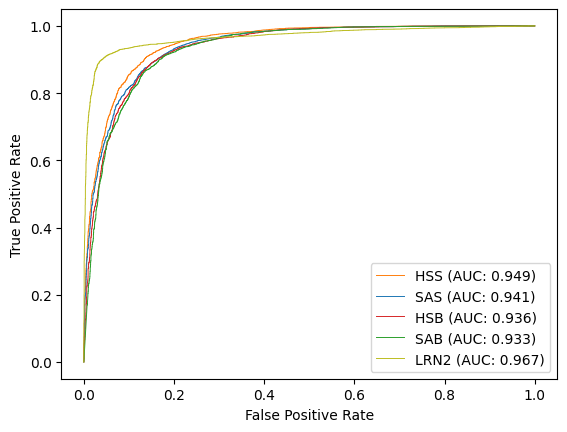

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

fpr_hsg, tpr_hsg, _ = roc_curve(hsgEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), hsgPreds)
fpr_sag, tpr_sag, _ = roc_curve(sagEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), sagPreds)
fpr_hsb, tpr_hsb, _ = roc_curve(hsbEvaluateDf['TARGET'], [(1-pred) for pred in hsbPreds])
fpr_sab, tpr_sab, _ = roc_curve(sabEvaluateDf['TARGET'], [(1-pred) for pred in sabPreds])
fpr_lrn, tpr_lrn, _ = roc_curve([1] * 4000 + [0] * 4000, lrnEvaluateDf[3])
# fpr_lrn2_full_gencode_checkpoint_100_new_config, tpr_lrn2_full_gencode_checkpoint_100_new_config, _ = roc_curve(lrn2_full_gencode_checkpoint_100_new_config_labels, lrn2_full_gencode_checkpoint_100_new_config_preds)
fpr_lrn2_full_gencode_checkpoint_200_new_config, tpr_lrn2_full_gencode_checkpoint_200_new_config, _ = roc_curve(lrn2_full_gencode_checkpoint_200_new_config_labels, lrn2_full_gencode_checkpoint_200_new_config_preds)

pyplot.plot(fpr_hsg, tpr_hsg, color='tab:orange', linewidth=0.7, label='HSS (AUC: ' + str(round(roc_auc_score(hsgEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), hsgPreds), 3)) + ')')
pyplot.plot(fpr_sag, tpr_sag, color='tab:blue', linewidth=0.7, label='SAS (AUC: ' + str(round(roc_auc_score(sagEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), sagPreds), 3)) + ')')
pyplot.plot(fpr_hsb, tpr_hsb, color='tab:red', linewidth=0.7, label='HSB (AUC: ' + str(round(roc_auc_score(hsbEvaluateDf['TARGET'], [(1-pred) for pred in hsbPreds]), 3)) + ')')
pyplot.plot(fpr_sab, tpr_sab, color='tab:green', linewidth=0.7, label='SAB (AUC: ' + str(round(roc_auc_score(sabEvaluateDf['TARGET'], [(1-pred) for pred in sabPreds]), 3)) + ')')
# pyplot.plot(fpr_lrn, tpr_lrn, color='tab:cyan', linewidth=0.7, label='LncRNAnet (AUC: ' + str(round(roc_auc_score([1] * 4000 + [0] * 4000, lrnEvaluateDf[3]), 3)) + ' *)')
# pyplot.plot(fpr_lrn2_full_gencode_checkpoint_100_new_config, tpr_lrn2_full_gencode_checkpoint_100_new_config, color='tab:gray', linewidth=0.7, label='LncRNAnet2 full_gencode_checkpoint_100 (AUC: ' + str(round(roc_auc_score(lrn2_full_gencode_checkpoint_100_new_config_labels, lrn2_full_gencode_checkpoint_100_new_config_preds), 3)) + ')')
pyplot.plot(fpr_lrn2_full_gencode_checkpoint_200_new_config, tpr_lrn2_full_gencode_checkpoint_200_new_config, color='tab:olive', linewidth=0.7, label='LRN2 (AUC: ' + str(round(roc_auc_score(lrn2_full_gencode_checkpoint_200_new_config_labels, lrn2_full_gencode_checkpoint_200_new_config_preds), 3)) + ')')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
# plt.figure(figsize=(15,10))
pyplot.show()

/tmp/ipykernel_1554569/1424203534.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hsbPreds, hist=True, rug=False, color='tab:orange', axlabel='Prediction Probability')
/tmp/ipykernel_1554569/1424203534.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sabPreds, hist=True, rug=False, colo

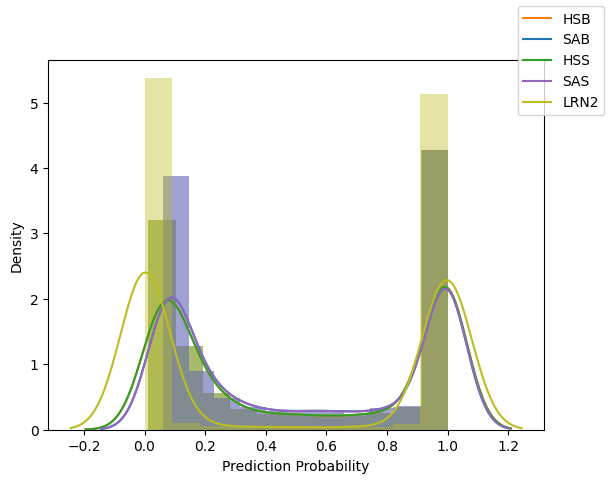

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
fpr_hsg, tpr_hsg, _ = roc_curve(hsgEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), hsgPreds)
fpr_sag, tpr_sag, _ = roc_curve(sagEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), sagPreds)
fpr_hsb, tpr_hsb, _ = roc_curve(hsbEvaluateDf['TARGET'], [(1-pred) for pred in hsbPreds])
fpr_sab, tpr_sab, _ = roc_curve(sabEvaluateDf['TARGET'], [(1-pred) for pred in sabPreds])
fpr_lrn, tpr_lrn, _ = roc_curve([1] * 4000 + [0] * 4000, lrnEvaluateDf[3])
# fpr_lrn2_full_gencode_checkpoint_100_new_config, tpr_lrn2_full_gencode_checkpoint_100_new_config, _ = roc_curve(lrn2_full_gencode_checkpoint_100_new_config_labels, lrn2_full_gencode_checkpoint_100_new_config_preds)
fpr_lrn2_full_gencode_checkpoint_200_new_config, tpr_lrn2_full_gencode_checkpoint_200_new_config, _ = roc_curve(lrn2_full_gencode_checkpoint_200_new_config_labels, lrn2_full_gencode_checkpoint_200_new_config_preds)
sns.distplot(hsbPreds, hist=True, rug=False, color='tab:orange', axlabel='Prediction Probability')
sns.distplot(sabPreds, hist=True, rug=False, color='tab:blue', axlabel='Prediction Probability')
sns.distplot(hsbPreds, hist=True, rug=False, color='tab:green', axlabel='Prediction Probability')
sns.distplot(sabPreds, hist=True, rug=False, color='tab:purple', axlabel='Prediction Probability')
sns.distplot(lrn2_full_gencode_checkpoint_200_new_config_preds, hist=True, rug=False, color='tab:olive', axlabel='Prediction Probability')
fig.legend(labels=['HSB','SAB', 'HSS','SAS', 'LRN2'])
plt.show()

In [27]:
def print_metrics(label, y_true, y_pred):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score

    print('---------------------------------------')
    print(label)
    print('---------------------------------------')
    print('Classification report:')
    print(classification_report(y_true, y_pred))
    print('Confusion matrix:')
    print(confusion_matrix(y_true, y_pred))
    print('Precision score: ', round(precision_score(y_true, y_pred), 4))
    print('Recall score (Sensitivity): ', round(recall_score(y_true, y_pred), 4))
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    print('Specificity: ', round((tn / (tn+fp)), 4))

In [28]:
print_metrics('linc2function HSG', hsgEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), [1 if pred>0.5 else 0 for pred in hsgPreds])

---------------------------------------
linc2function HSG
---------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4000
           1       0.88      0.89      0.88      4000

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000

Confusion matrix:
[[3504  496]
 [ 459 3541]]
Precision score:  0.8771
Recall score (Sensitivity):  0.8852
Specificity:  0.876


In [29]:
print_metrics('linc2function SAG', sagEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), [1 if pred>0.5 else 0 for pred in sagPreds])

---------------------------------------
linc2function SAG
---------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4000
           1       0.87      0.86      0.87      4000

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000

Confusion matrix:
[[3492  508]
 [ 550 3450]]
Precision score:  0.8717
Recall score (Sensitivity):  0.8625
Specificity:  0.873


In [30]:
print_metrics('linc2function HSB', hsbEvaluateDf['TARGET'], [0 if pred>0.5 else 1 for pred in hsbPreds])

---------------------------------------
linc2function HSB
---------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4000
           1       0.86      0.88      0.87      4000

    accuracy                           0.87      8000
   macro avg       0.87      0.87      0.87      8000
weighted avg       0.87      0.87      0.87      8000

Confusion matrix:
[[3422  578]
 [ 474 3526]]
Precision score:  0.8592
Recall score (Sensitivity):  0.8815
Specificity:  0.8555


In [31]:
print_metrics('linc2function SAB', sabEvaluateDf['TARGET'], [0 if pred>0.5 else 1 for pred in sabPreds])

---------------------------------------
linc2function SAB
---------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4000
           1       0.86      0.87      0.86      4000

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000

Confusion matrix:
[[3429  571]
 [ 519 3481]]
Precision score:  0.8591
Recall score (Sensitivity):  0.8702
Specificity:  0.8572


In [32]:
print_metrics('LncRNAnet', [1] * 4000 + [0] * 4000, [1 if pred>0.5 else 0 for pred in lrnEvaluateDf[3]])

---------------------------------------
LncRNAnet
---------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      4000
           1       0.97      0.90      0.93      4000

    accuracy                           0.94      8000
   macro avg       0.94      0.94      0.94      8000
weighted avg       0.94      0.94      0.94      8000

Confusion matrix:
[[3908   92]
 [ 415 3585]]
Precision score:  0.975
Recall score (Sensitivity):  0.8962
Specificity:  0.977


In [33]:
print_metrics('LncRNAnet2', lrn2_full_gencode_checkpoint_200_new_config_labels, [1 if pred>0.5 else 0 for pred in lrn2_full_gencode_checkpoint_200_new_config_preds])

---------------------------------------
LncRNAnet2
---------------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      4000
         1.0       0.94      0.92      0.93      4000

    accuracy                           0.93      8000
   macro avg       0.93      0.93      0.93      8000
weighted avg       0.93      0.93      0.93      8000

Confusion matrix:
[[3771  229]
 [ 336 3664]]
Precision score:  0.9412
Recall score (Sensitivity):  0.916
Specificity:  0.9428


In [34]:
def get_metrics_list(label, y_true, y_pred, auroc):

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score

    precision = round(precision_score(y_true, y_pred), 4)
    recall = round(recall_score(y_true, y_pred), 4)
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    specificity = round((tn / (tn+fp)), 4)
    specificity = tn / (tn+fp)
    f1 = round(f1_score(y_true, y_pred), 4)

    return [label, precision, recall, specificity, auroc, f1]

In [39]:
data = []
data.append(get_metrics_list('linc2function HSS', hsgEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), [1 if pred>0.5 else 0 for pred in hsgPreds], round(roc_auc_score(hsgEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), hsgPreds), 3)))
data.append(get_metrics_list('linc2function SAS', sagEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), [1 if pred>0.5 else 0 for pred in sagPreds], round(roc_auc_score(sagEvaluateDf['TARGET'].map({'coding': 0, 'noncoding': 1}), sagPreds), 3)))
data.append(get_metrics_list('linc2function HSB', hsbEvaluateDf['TARGET'], [0 if pred>0.5 else 1 for pred in hsbPreds], round(roc_auc_score(hsbEvaluateDf['TARGET'], [(1-pred) for pred in hsbPreds]), 3)))
data.append(get_metrics_list('linc2function SAB', sabEvaluateDf['TARGET'], [0 if pred>0.5 else 1 for pred in sabPreds], round(roc_auc_score(sabEvaluateDf['TARGET'], [(1-pred) for pred in sabPreds]), 3)))
data.append(get_metrics_list('LncRNAnet', [1] * 4000 + [0] * 4000, [1 if pred>0.5 else 0 for pred in lrnEvaluateDf[3]], round(roc_auc_score([1] * 4000 + [0] * 4000, lrnEvaluateDf[3]), 3)))
data.append(get_metrics_list('linc2function LRN2', lrn2_full_gencode_checkpoint_200_new_config_labels, [1 if pred>0.5 else 0 for pred in lrn2_full_gencode_checkpoint_200_new_config_preds], round(roc_auc_score(lrn2_full_gencode_checkpoint_200_new_config_labels, lrn2_full_gencode_checkpoint_200_new_config_preds), 3)))

In [40]:
plotDf = pd.DataFrame(data, columns=['Model', 'Precision', 'Recall', 'Specificity', 'AUROC', 'f1'])

In [41]:
plotDf

Model  Precision  Recall  Specificity  AUROC      f1
0   linc2function HSS     0.8771  0.8852      0.87600  0.949  0.8812
1   linc2function SAS     0.8717  0.8625      0.87300  0.941  0.8671
2   linc2function HSB     0.8592  0.8815      0.85550  0.936  0.8702
3   linc2function SAB     0.8591  0.8702      0.85725  0.933  0.8646
4           LncRNAnet     0.9750  0.8962      0.97700  0.977  0.9340
5  linc2function LRN2     0.9412  0.9160      0.94275  0.967  0.9284

In [45]:
from scipy.stats import ttest_ind

hsb_t, hsb_p = ttest_ind(hsbPreds, lrnEvaluateDf[3])
sab_t, sab_p = ttest_ind(sabPreds, lrnEvaluateDf[3])
hss_t, hss_p = ttest_ind(hsgPreds, lrnEvaluateDf[3])
sas_t, sas_p = ttest_ind(sagPreds, lrnEvaluateDf[3])
lrn_t, lrn_p = ttest_ind(lrn2_full_gencode_checkpoint_200_new_config_preds, lrnEvaluateDf[3])

print('hsb_t: ', hsb_t, 'hsb_p: ', hsb_p)
print('sab_t: ', sab_t, 'sab_p: ', sab_p)
print('hss_t: ', hss_t, 'hss_p: ', hss_p)
print('sas_t: ', sas_t, 'sas_p: ', sas_p)
print('lrn_t: ', lrn_t, 'lrn_p: ', lrn_p)


hsb_t:  [7.385314] hsb_p:  [1.5958404e-13]
sab_t:  [8.460638] sab_p:  [2.886582e-17]
hss_t:  [1.0176405] hss_p:  [0.30886424]
sas_t:  [-0.7347397] sas_p:  [0.4625088]
lrn_t:  2.0755646677247825 lrn_p:  0.037950170078008355
